In [1]:
import matplotlib.pyplot as plt
import sys
import heapq

In [2]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=15)       

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333
4 16233.3333 31533.3333
5 16250.0000 31516.6667
6 16300.0000 29250.0000
7 16500.0000 29933.3333
8 16516.6667 28800.0000


In [3]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [4]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.figure(figsize=(20, 16))
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [5]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

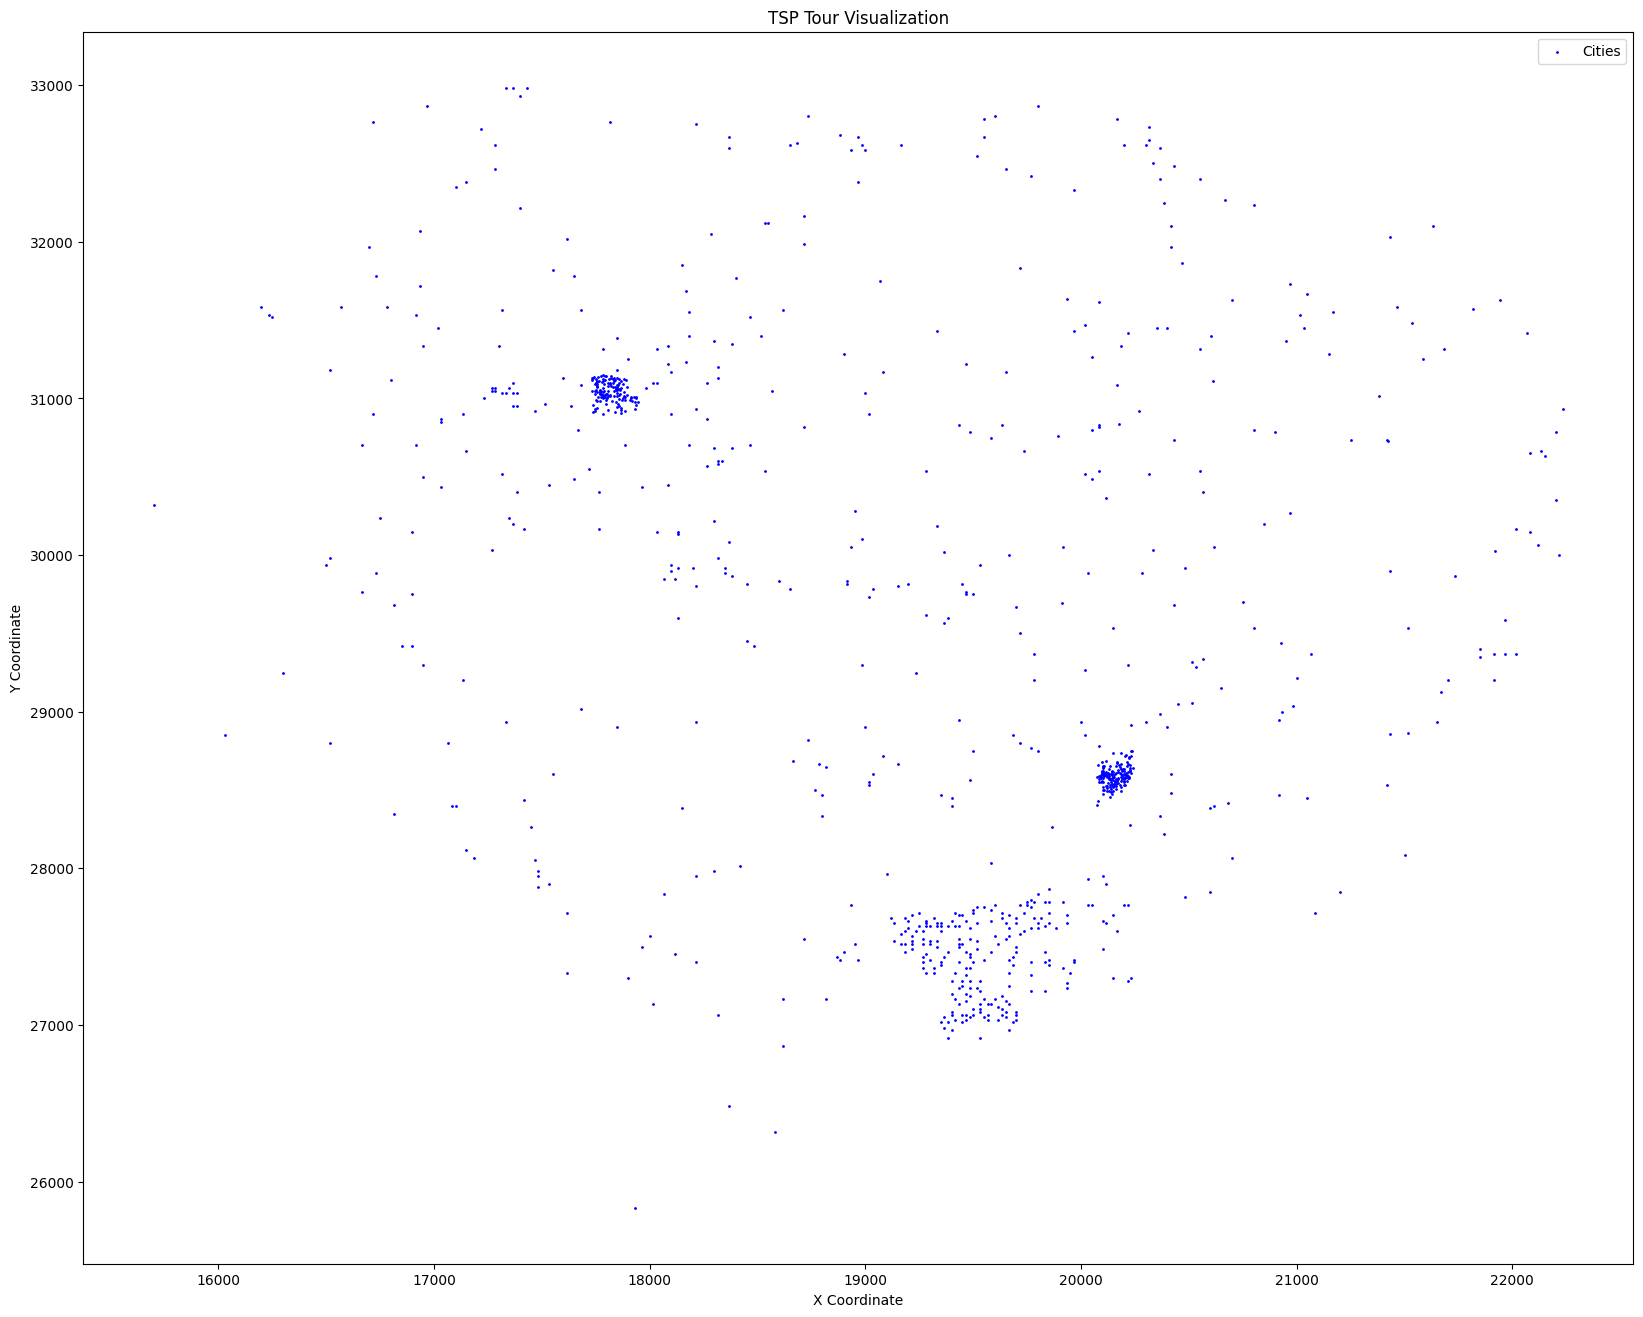

In [6]:
plot_tsp(nodes, show_path=True)

In [7]:
class Graph():
    def __init__(self,size,nodes):
        self.size = size
        self.nodes = nodes
        self.distance = [[0] * size for _ in range(size)]
        self.euclidean_distance = [[0] * size for _ in range(size)]
        self.history2 = [[i] for i in range(self.size)]

    def euclidean(self,node1,node2):
        distance = (((node1[0]-node2[0])**2)+((node1[1]-node2[1])**2))**0.5
        return distance

    def add_edge(self, u, v, weight):
        self.distance[u][v] = weight
        self.distance[v][u] = weight

    def make_edges(self):
        self.edges = []
        for i in range(self.size):
            for j in range(i + 1, self.size):  # Only upper triangle
                if self.distance[i][j] != 0:
                    self.edges.append((i, j))

    def K_nearest(self, K=3):
        self.K = K
        for i, node1 in enumerate(self.nodes):
            distances = []
            for j, node2 in enumerate(self.nodes):
                if i != j:
                    dist = self.euclidean(node1, node2)
                    distances.append((dist, j))
            distances.sort()
            for k in range(K):
                dist, neighbor = distances[k]
                self.add_edge(i, neighbor, dist)
        self.make_edges()

    def visualize_graph_matplotlib(self,mode = 1):
        plt.figure(figsize=(20, 16))
        # Draw all edges
        for i, j in self.edges:
            x_values = [self.nodes[i][0], self.nodes[j][0]]
            y_values = [self.nodes[i][1], self.nodes[j][1]]
            plt.plot(x_values, y_values, color='gray', linewidth=0.5, zorder=1)

        # Highlight path (if any)
        if mode >= 2 and hasattr(self, 'history'):
            for i, j in self.history:
                x_values = [self.nodes[i][0], self.nodes[j][0]]
                y_values = [self.nodes[i][1], self.nodes[j][1]]
                plt.plot(x_values, y_values, color='red', linewidth=2, zorder=3)
                
            plt.scatter(self.nodes[self.start][0], self.nodes[self.start][1], color='blue', label='Cities',s = 20,zorder=4,edgecolors='green')
            plt.scatter(self.nodes[self.end][0], self.nodes[self.end][1], color='blue', label='Cities',s = 20,zorder=4,edgecolors='green')
        if mode >= 3 and hasattr(self, 'all_explored_paths'):
            for i, j in self.all_explored_paths:
                x_values = [self.nodes[i][0], self.nodes[j][0]]
                y_values = [self.nodes[i][1], self.nodes[j][1]]
                plt.plot(x_values, y_values, color='green', linewidth=2, zorder=2)        
        
        # Draw nodes start and end
        x_coords = [node[0] for node in self.nodes]
        y_coords = [node[1] for node in self.nodes]
        plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1,zorder=2,edgecolors='blue')

        # Add labels
        for idx, (x, y) in enumerate(self.nodes):
            plt.text(x, y, str(idx), fontsize=9, ha='center', va='center', zorder=3, color='black')

        plt.title("Undirected Graph Visualization")
        #plt.axis('equal')  # Keep aspect ratio square
        plt.grid(True)
        plt.show()

    def dijkstra(self,start,end):
        self.start, self.end = start, end
        cost =  [sys.maxsize]*self.size
        visited = [False] * self.size
        previous = [None] * self.size
        self.history = []  # Final path
        self.all_explored_paths = []  # All visited edges
        
        cost[start] = 0
        count = 0
        Queue = [(0,start)]

        while Queue:
            current_cost,current_node = heapq.heappop(Queue)
            if(visited[current_node]):continue
            visited[current_node] = True

            for neighbor, weight in enumerate(self.distance[current_node]):
                if(weight > 0):
                    new_cost = current_cost + weight
                    if(new_cost < cost[neighbor] ):
                        cost[neighbor] = new_cost
                        count = count + 1
                        previous[neighbor] = current_node
                        heapq.heappush(Queue,(new_cost,neighbor))
                        #self.history.append((current_node,neighbor))
                        self.all_explored_paths.append((current_node, neighbor))
        print(count)
        self.history = self.reconstruct_path(previous, start, end)
        self.visualize_graph_matplotlib(3)
 
    def A_star(self,start,end):
        self.start, self.end = start, end
        cost = [sys.maxsize] * self.size
        visited = [False] * self.size
        previous = [None] * self.size
        self.history = []
        self.all_explored_paths = []  # All visited edges

        cost[start] = 0
        count = 0
        Queue = [(0,start)]

        while Queue:
            current_cost,current_node = heapq.heappop(Queue)   
            if(visited[current_node]): continue
            visited[current_node] = True
            if (current_node == end):break

            for neighbor, weight in enumerate(self.distance[current_node]):
                if(weight > 0):
                    tentative_cost = cost[current_node] + weight
                    if(tentative_cost < cost[neighbor]):
                        cost[neighbor] = tentative_cost
                        previous[neighbor] = current_node
                        count = count + 1
                        priority = tentative_cost + self.euclidean(self.nodes[neighbor], self.nodes[end])
                        heapq.heappush(Queue,(priority,neighbor))
                        #self.history.append((current_node,neighbor))
                        self.all_explored_paths.append((current_node, neighbor))
        print(count)
        self.history = self.reconstruct_path(previous, start, end)
        self.visualize_graph_matplotlib(3)

    def reconstruct_path(self, previous, start, end):
        path = []
        current = end
        while previous[current] is not None:
            path.append((previous[current], current))
            current = previous[current]
        path.reverse()
        return path    

In [8]:
My_Graph = Graph(929, nodes)
My_Graph.K_nearest(6)
#My_Graph.visualize_graph_matplotlib()

1252


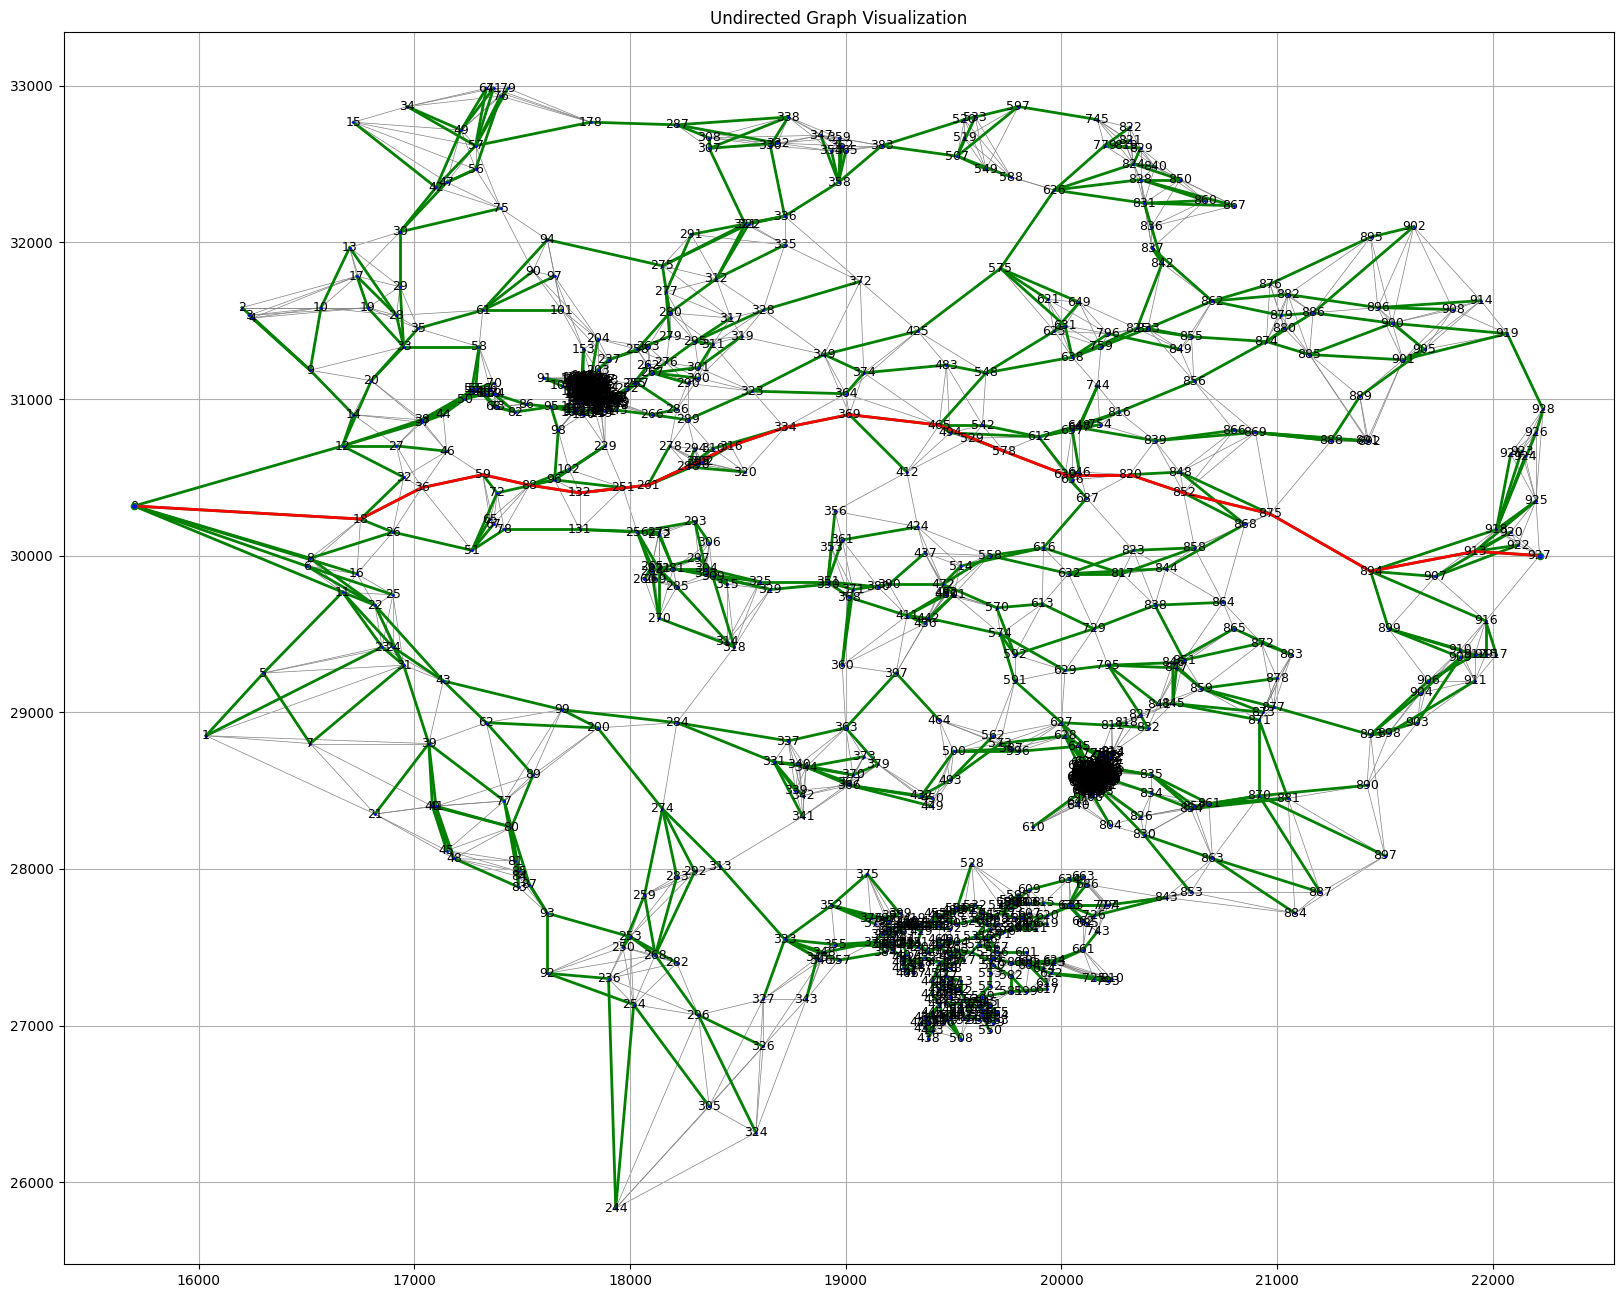

In [9]:
My_Graph.dijkstra(0,927)

556


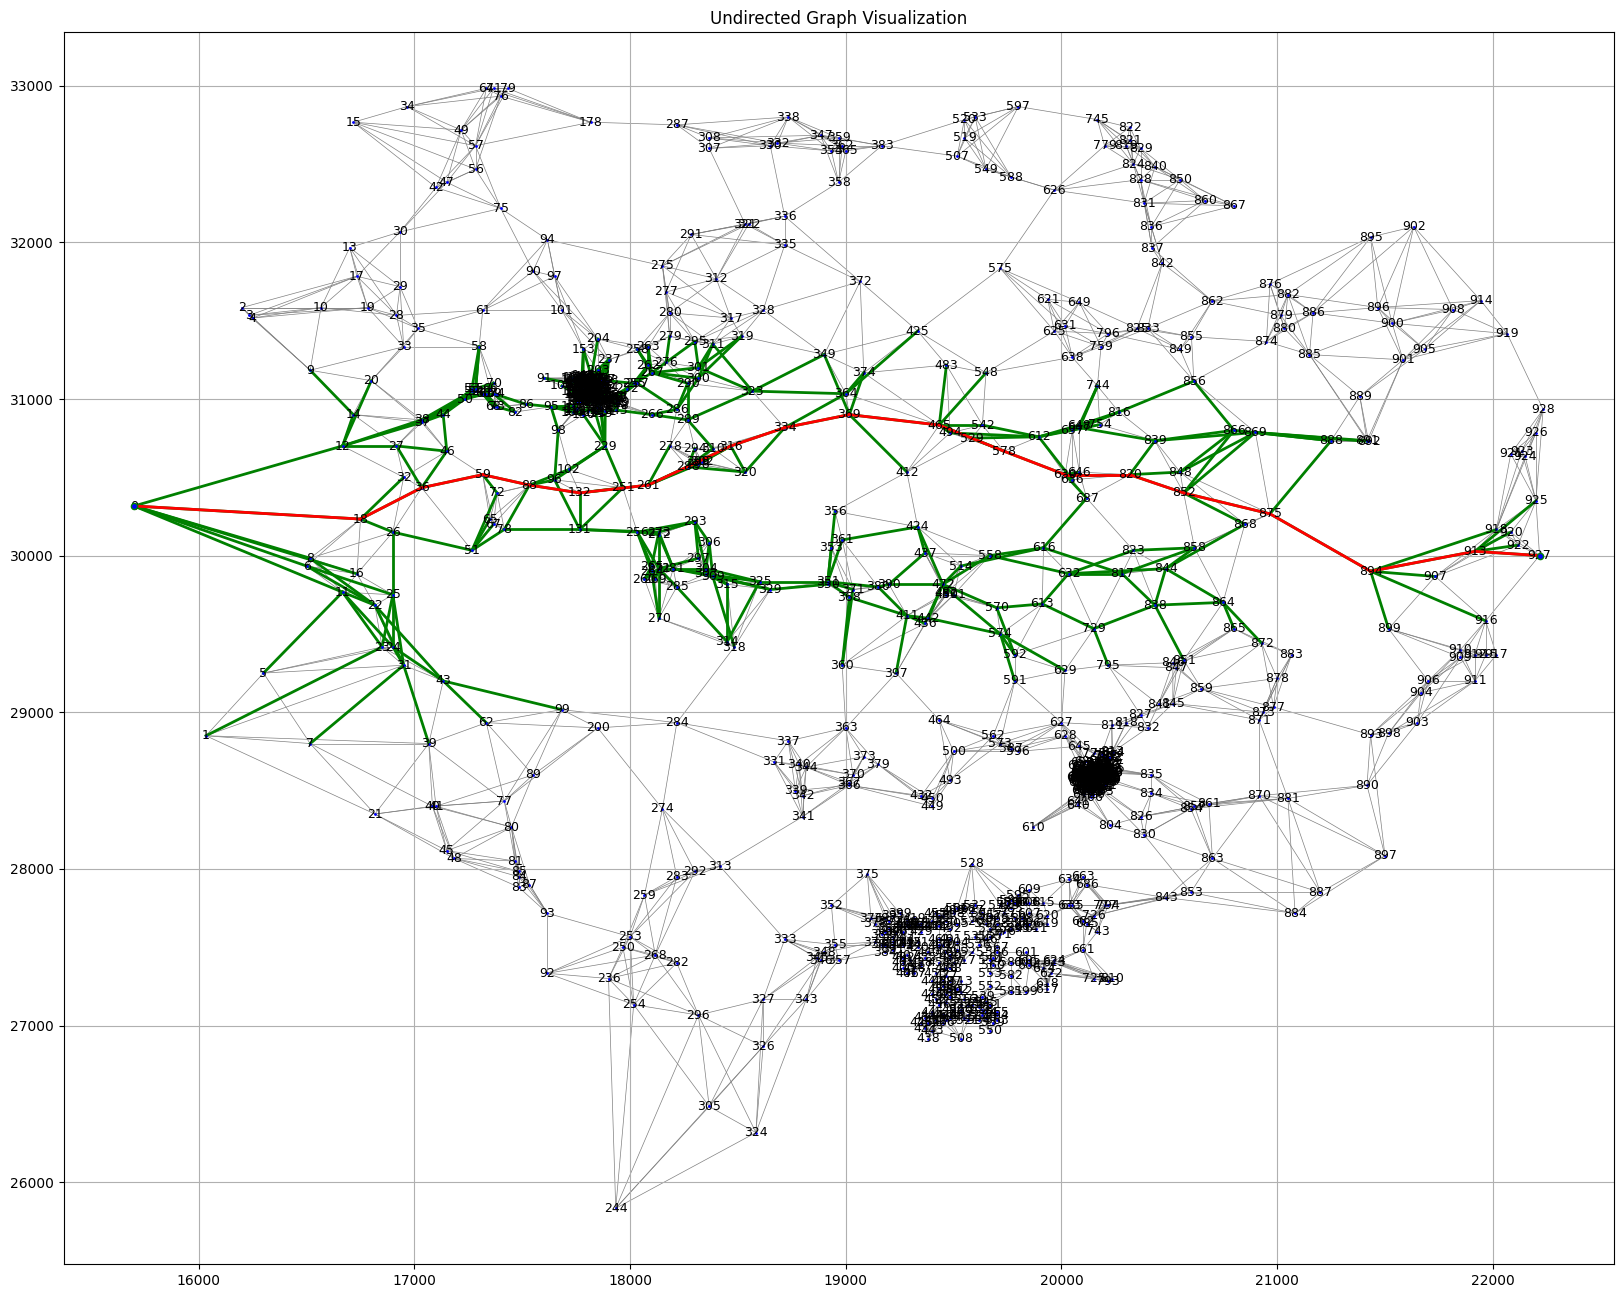

In [10]:
My_Graph.A_star(0,927)

In [11]:
#print(My_Graph.box[1])
print(My_Graph.nodes)
print(My_Graph.edges)
#print(My_Graph.euclidean_distance)

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17